<a href="https://colab.research.google.com/github/juancamilo-talento-tech/talentotech/blob/main/Regresion_logistica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/majuradoe19761/prediccin-de-inundaciones-en-reas-urbanas

Este conjunto de datos contiene información simulada para predecir la probabilidad de inundación en áreas urbanas. Las variables incluyen factores ambientales como la precipitación, el nivel del río, la vegetación y el grado de impermeabilización, entre otros. El objetivo es utilizar esta información para identificar áreas de alto riesgo de inundación y tomar medidas preventivas.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,9)
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('inundaciones-simuladas.csv')
df

,precipitacion,nivel_rio,vegetacion,altitud,impermeabilizacion,sistema_drenaje,alerta,vulnerabilidad,inundacion
0,112.362036,0.314292,64.203165,25.840861,10.312387,1,0,0,0
1,285.214292,6.364104,8.413996,265.677316,90.255291,0,1,1,1
2,219.598183,3.143560,16.162871,270.317561,50.525237,0,1,1,1
3,179.597545,5.085707,89.855419,318.714951,82.645747,0,0,0,1
4,46.805592,9.075665,60.642906,363.045667,32.004960,0,1,1,0
...,...,...,...,...,...,...,...,...,...
95,148.138679,3.492096,52.224326,465.378663,35.335223,1,0,1,0
96,156.819849,7.259557,76.999355,429.206376,58.365611,1,1,2,1
97,128.262306,8.971103,21.582103,214.497014,7.773464,1,0,2,1
98,7.625738,8.870864,62.289048,375.435534,97.439481,1,0,0,0


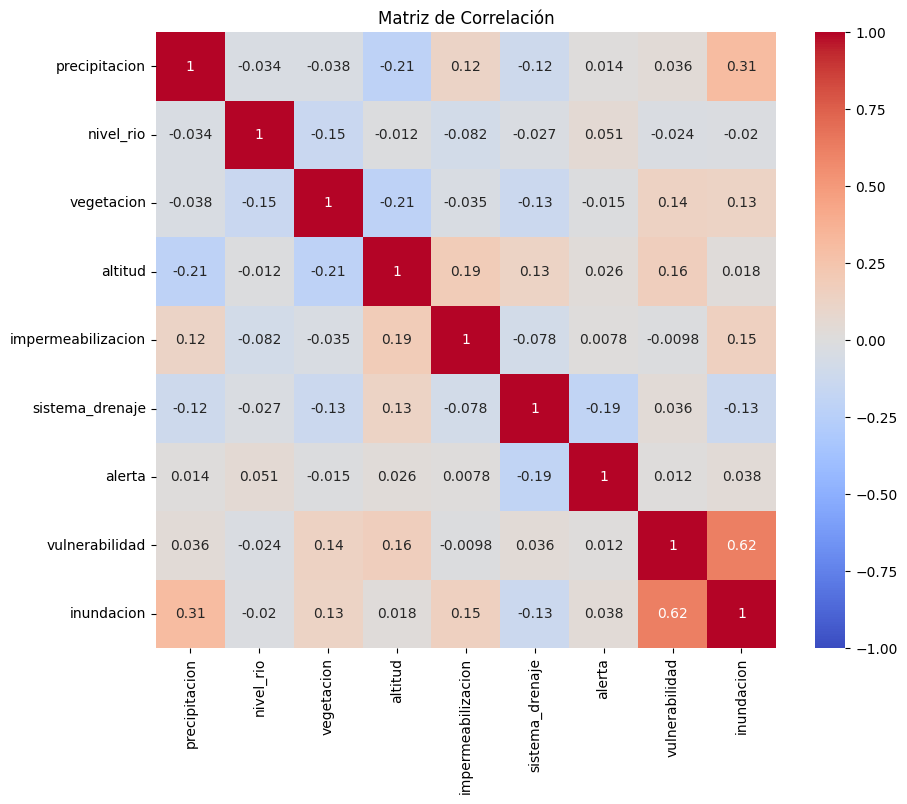

[[<Axes: title={'center': 'precipitacion'}>
  <Axes: title={'center': 'vegetacion'}>]
 [<Axes: title={'center': 'impermeabilizacion'}> <Axes: >]]


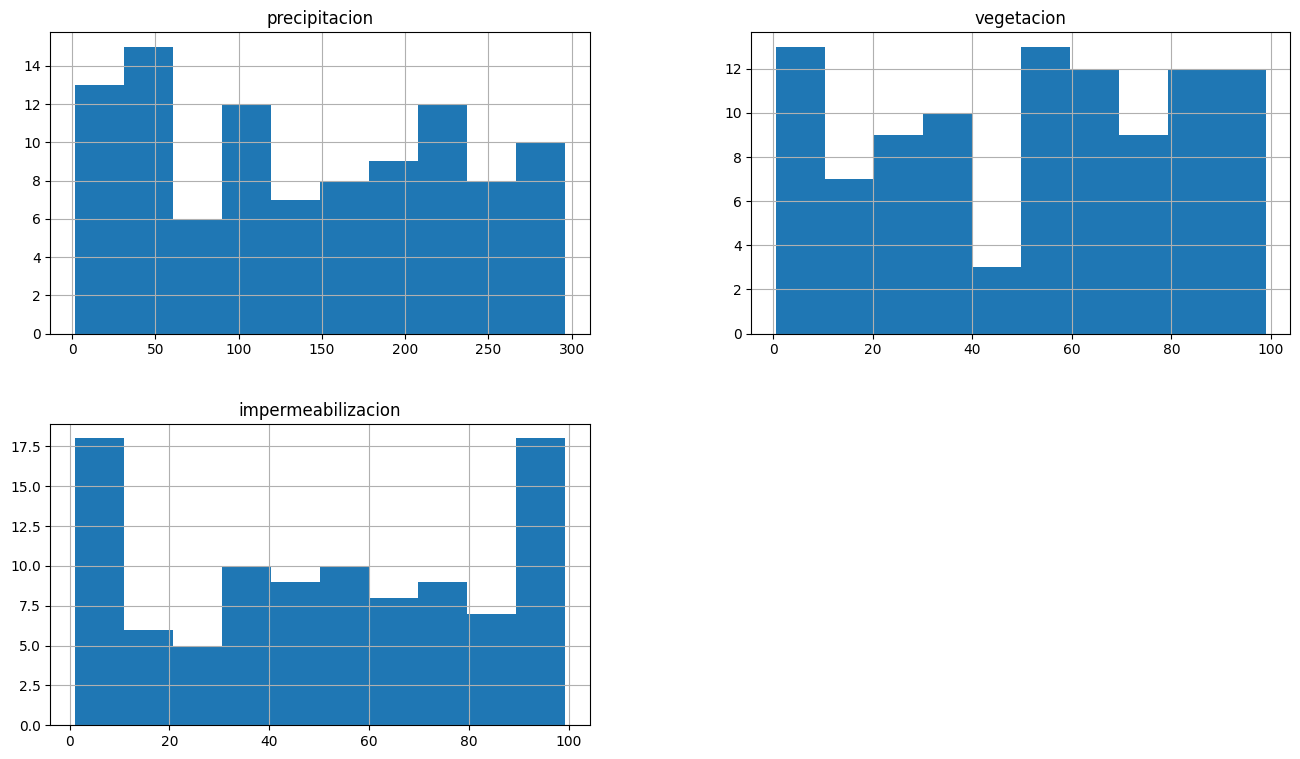

In [12]:
# Calculamos la matriz de correlación
corr_matrix = df.corr()

# Creamos el mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


In [18]:
# Eligiendo variables de entrada y salida
x=np.array(df.drop(["inundacion", "vulnerabilidad", "nivel_rio", "sistema_drenaje", "altitud", "alerta"], axis=1))
#print(x)
y=np.array(df["inundacion"])
print(y)

[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0]


In [16]:
#Entrenar modelo de regresion logistica
model= linear_model.LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [17]:
# Predecir con el modelo
predictor=model.predict(x)
print(predictor)

[0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0]


In [19]:
#validar porcentaje de modelo de regresion logistica
modelporc=model.score(x,y)
print("modelporc")

0.68


In [23]:
#validando el modelo
#Dividir el dataframe en daros train y validadicion
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=30)

In [34]:
# validacion cruzada
nfold=model_selection.KFold(n_splits=50, shuffle=True, random_state=30)
cv_result=model_selection.cross_val_score(model, x_train, y_train, cv=nfold, scoring="accuracy")
# presiscion y deciacion standar
print(cv_result.mean()*100, cv_result.std())

56.00000000000001 0.4079215610874228


In [43]:
# Precision del modelo de prediccion
y_predict=model.predict(x_val)
accuracy_mp=accuracy_score(y_val, y_predict)
print(accuracy_mp)

0.75


In [44]:
#Matriz de confusion
print(confusion_matrix(y_val, y_predict))


[[7 3]
 [2 8]]


In [45]:
#visualizar reporte de clasificacion
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.73      0.80      0.76        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [47]:
x_new=pd.DataFrame({"precipitacion":[180], "vegetacion":[90], "ipermeabilizacion":[80]})
predic_new=model.predict(x_new)
print(predic_new)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
